In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [2]:
from EXPLib.xai_library.model_explainers.cam.yolo_cam import yolo_cam_utils

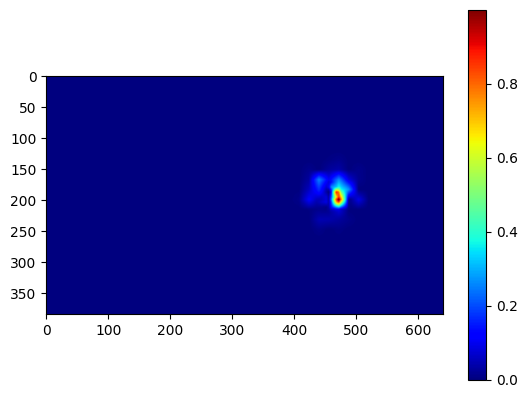


0: 384x640 7 cars, 1 parking meter, 43.1ms
Speed: 0.0ms preprocess, 43.1ms inference, 59.3ms postprocess per image at shape (1, 3, 384, 640)
Attribute Error found ....


In [3]:
## Comment out target_class or set to None to get the classes from the prediction, 
## Then add preferred target_class for heatmap per class
## In the below example, target_class can be set as 2 or 12
cam_params = {
         'weight': 'EXPLib/dl_component/CNN/Object_Detectors/yolo8/yolov8n.pt', 
         'device': 'cuda:0',
         ##'HiResCAM','GradCAM', 'GradCAMPlusPlus', 'GradCAM', 'XGradCAM', 'EigenCAM', 'HiResCAM', 'LayerCAM', 'RandomCAM', 'EigenGradCAM'
         'method': 'HiResCAM',
         'layer': [10, 12, 14, 16, 18],
         'backward_type': 'box', # class, box, all
         'conf_threshold': 0.2,
         'ratio': 0.02,
         'target_class': 12,
         'show_box': False,
         'renormalize': True
     }

test_img='EXPLib/datasets/Camera/test_images/rs00042.jpg'
## The output_folder is not used, no image shall be saved
output_folder='EXPLib/results/yolo-cam'
gradcam = yolo_cam_utils.YOLOHeatmap(cam_params)
gradcam(test_img, output_folder)